In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# scipy is an extension for numpy, used extensively in scientific computing
from scipy.sparse import linalg
from scipy.sparse import lil_matrix, csc_matrix

# here we import the functions translated from matlab
# to do so, we need to change the relative path
import sys
sys.path.append('../FEM')

import Mesher
import Matrix
import PoroElasticProperties as prop

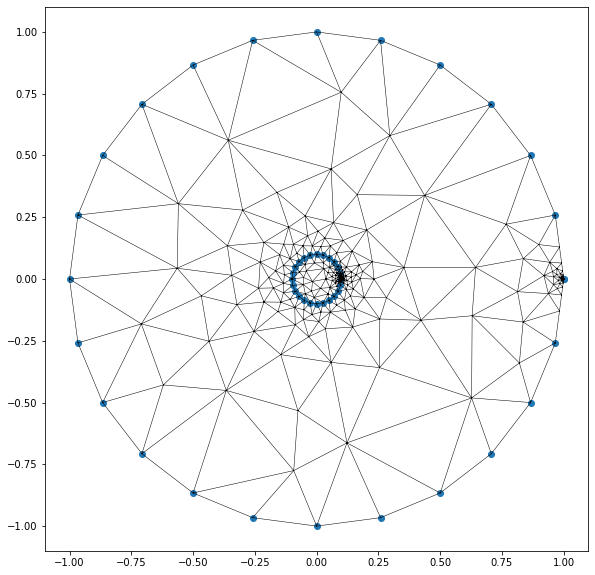

In [13]:

# we can define the geometry of the problem

r = 0.1
R = 1
nradius = 25

theta = np.linspace(0, 2*np.pi, nradius)
x = np.cos(theta)
y = np.sin(theta)

inner = r * np.stack((x, y)).T
outer = R * np.stack((x, y)).T

inner_edges = Mesher.build_edges(inner)
outer_edges = Mesher.build_edges(outer) + len(inner_edges)


vertices = np.vstack((outer, inner))
edges = np.vstack((outer_edges, inner_edges))

area = 1
mesh = Mesher.Mesh(vertices, edges, cell_size=area)

mesh.plot()
plt.gcf().set_size_inches(10, 10)
plt.gca().set_aspect(1)
plt.scatter(*vertices.T)